In [85]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pylab import cm
import mpltex
import os
from os import listdir
from os.path import isfile, join
import itertools
from matplotlib import pyplot
from scipy import stats

import re

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


In [43]:
current_path = os.getcwd()
mypath = current_path
fp_rates = []

for f in listdir(mypath):
    if f[-4:] == ".pkl":
        filename = os.path.splitext(f)[0]
        t = filename.split('_')
        fp_rates.append(float(t[1]))

fp_rates = sorted(fp_rates)


In [44]:
fp_dict = {}

for fp in fp_rates:
    file = open(f"result_{fp}_1.pkl",'rb')
    object_file = pickle.load(file)
    file.close()
    temp = {}
    for metric, metric_dict in object_file.items():
        temp[metric] = {}
        for policy_omega, policy_omega_dict in metric_dict.items():
            if policy_omega.split('_')[0] == "No investigation":
                renamed_policy_omega = "No Investigation_"+policy_omega.split('_')[1]
                temp[metric][renamed_policy_omega] = policy_omega_dict
            elif policy_omega.split('_')[0] == "LowFP":
                renamed_policy_omega = "MinFP_"+policy_omega.split('_')[1]
                temp[metric][renamed_policy_omega] = policy_omega_dict
            else:
                temp[metric][policy_omega] = policy_omega_dict
    fp_dict[fp] = temp

In [45]:
policies = ["No Investigation", "Random",  "Bayes", "MaxEntropy", "MinFP", "All"]
policies = sorted(policies)
omegas = [omega.split('_')[1] for omega in fp_dict[fp]['MSE'].keys()]
omegas = sorted(np.unique(omegas))

fp_dict[fp_rate][metric][Policy_omega]
fp_dict[0.1]['MSE']['Raw_1'].keys()

In [75]:
result_dict = {}
for omega in omegas:
    result_dict[omega] = {}
    for policy in policies:
        result_dict[omega][policy] = []

In [76]:
for omega, omega_dict in result_dict.items():
    for policy, policy_omega_list in omega_dict.items():
        name = policy+'_'+str(omega)
        for fp in fp_dict:
            temp = np.zeros([fp_dict[fp]['MSE'][name].shape[0]+1])
            temp[0] = fp
            temp[1:] = fp_dict[fp]['MSE'][name][:,-1]
            result_dict[omega][policy].append(temp)

for k1, v1 in result_dict.items():
    for k2, v2 in v1.items():
        temp = np.array(v2)
        result_dict[k1][k2] =temp[np.argsort(temp[:,0])]
        

In [80]:
del omegas[0]

In [81]:
omegas

['0.95', '1']

In [82]:
policies
del policies[-1]

In [83]:
policies

['All', 'Bayes', 'MaxEntropy', 'MinFP', 'No Investigation']

1
0.95


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


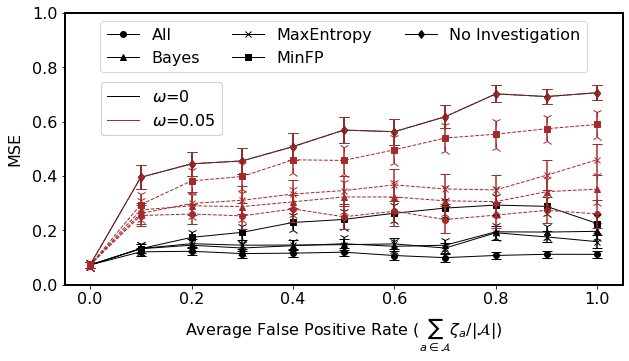

In [93]:
fig, axes = plt.subplots(nrows = 1, ncols=1, figsize=(10,5))
import matplotlib
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
fp_idx = []
for fp in fp_rates:
    fp_idx.append(float(fp))
fp_idx = sorted(fp_idx)
c = ['black','red']
locs = ["upper left", "upper center"]

lll = ['-', ':']
mmm = ['o','^', 'x', 's', 'd']
c = ['black', 'brown']
cc = itertools.cycle(c)
ll = itertools.cycle(lll)
mm = itertools.cycle(mmm)
plot_lines = []
for omega in omegas[::-1]:
    j = 0
    each_omega = []
    c = next(cc)
    l = next(ll)
    for policy in policies:
        m = next(mm)    
        x =  result_dict[omega][policy][:,0]
        policy_omega_list = result_dict[omega][policy][:,1:].mean(axis=1)
        axes.plot(x, policy_omega_list, l, color=c, marker = m, linewidth=1)
        j += 1
    # plot_lines.append(each_omega)

axes.set_ylim([0,1])
lines = axes.get_lines()
legend1 = pyplot.legend([lines[i] for i in [0,1,2,3,4,5]], policies, ncol = 3, loc="upper center")
axes.add_artist(legend1)
for l in lines:
    l.set_marker('')
    l.set_linestyle('-')
legend2 = pyplot.legend([lines[i] for i in [0,6] ], ["$\omega$=0", "$\omega$=0.05"], loc=(0.065,0.55))
axes.add_artist(legend2)

l = next(ll)
mm = itertools.cycle(mmm)
for i, l in enumerate(lines):
    m = next(mm)    
    st= matplotlib.markers.MarkerStyle(m)
    l.set_marker(st)
    # l.set_fillstyle('none')

for i, l in enumerate(lines):
    if i>4:
        l.set_linestyle('--')
axes.set_ylabel('MSE', labelpad=10)
axes.set_xlabel('Average False Positive Rate ($\sum _{a \in \mathcal{A}}\zeta_a / |\mathcal{A}|$)', labelpad=10)

up_marker = ['_', "1"]
down_marker = ['_', "2"]
l = ['-', ':']
mmm = ['o','^', 'x', 's', 'd']
c = ['black', 'brown']
cc = itertools.cycle(c)
ll = itertools.cycle(l)
mm = itertools.cycle(mmm)
for omega in omegas[::-1]:
    print(omega)
    c = next(cc)
    l = next(ll)
    up = itertools.cycle(up_marker)
    down = itertools.cycle(down_marker)
    for policy in policies:
        u = next(up)    
        d = next(down)
        if policy != 'Random':
            val = result_dict[omega][policy]
            mean = val[:,1:].mean(axis=1)
            std = val[:,1:].std(axis = 1)
            n= val.shape[1]
            yerr = std / np.sqrt(n) * stats.t.ppf(1-0.05/2, n - 1)
            x = val[:,0]
            bar1 = plt.errorbar(x, 
                                y=mean, 
                                linestyle='', 
                                yerr = yerr,                         
                                # label=f'{policy}', 
                                # marker=m, 
                                color=c, 
                                # markevery=10, 
                                capsize=0
                                )
            plt.plot(x,mean+yerr, marker=u, ls="", color=c, ms=10)
            plt.plot(x,mean-yerr, marker=d, ls="", color=c, ms=10)
            
fig.savefig('fp_rates.eps', format='eps', bbox_inches='tight')
plt.show()



In [79]:
omegas

['0.9', '0.95', '1']